In [1]:
import pyspark
from pyspark.sql.functions import *
import matplotlib.pyplot as plt

In [2]:
movies = spark.read.csv("./ml-latest-small/movies.csv", header = True, inferSchema = True)
ratings = spark.read.csv("./ml-latest-small/ratings.csv", header = True, inferSchema = True)

In [3]:
movies.show()

+-------+--------------------+--------------------+
|movieId|               title|              genres|
+-------+--------------------+--------------------+
|      1|    Toy Story (1995)|Adventure|Animati...|
|      2|      Jumanji (1995)|Adventure|Childre...|
|      3|Grumpier Old Men ...|      Comedy|Romance|
|      4|Waiting to Exhale...|Comedy|Drama|Romance|
|      5|Father of the Bri...|              Comedy|
|      6|         Heat (1995)|Action|Crime|Thri...|
|      7|      Sabrina (1995)|      Comedy|Romance|
|      8| Tom and Huck (1995)|  Adventure|Children|
|      9| Sudden Death (1995)|              Action|
|     10|    GoldenEye (1995)|Action|Adventure|...|
|     11|American Presiden...|Comedy|Drama|Romance|
|     12|Dracula: Dead and...|       Comedy|Horror|
|     13|        Balto (1995)|Adventure|Animati...|
|     14|        Nixon (1995)|               Drama|
|     15|Cutthroat Island ...|Action|Adventure|...|
|     16|       Casino (1995)|         Crime|Drama|
|     17|Sen

In [4]:
m = movies.withColumn("genres", explode(split("genres", "[|]")))

In [5]:
m.show()

+-------+--------------------+---------+
|movieId|               title|   genres|
+-------+--------------------+---------+
|      1|    Toy Story (1995)|Adventure|
|      1|    Toy Story (1995)|Animation|
|      1|    Toy Story (1995)| Children|
|      1|    Toy Story (1995)|   Comedy|
|      1|    Toy Story (1995)|  Fantasy|
|      2|      Jumanji (1995)|Adventure|
|      2|      Jumanji (1995)| Children|
|      2|      Jumanji (1995)|  Fantasy|
|      3|Grumpier Old Men ...|   Comedy|
|      3|Grumpier Old Men ...|  Romance|
|      4|Waiting to Exhale...|   Comedy|
|      4|Waiting to Exhale...|    Drama|
|      4|Waiting to Exhale...|  Romance|
|      5|Father of the Bri...|   Comedy|
|      6|         Heat (1995)|   Action|
|      6|         Heat (1995)|    Crime|
|      6|         Heat (1995)| Thriller|
|      7|      Sabrina (1995)|   Comedy|
|      7|      Sabrina (1995)|  Romance|
|      8| Tom and Huck (1995)|Adventure|
+-------+--------------------+---------+
only showing top

In [6]:
genre = m.groupBy("genres").count()
genre.show()

+------------------+-----+
|            genres|count|
+------------------+-----+
|             Crime| 1199|
|           Romance| 1596|
|          Thriller| 1894|
|         Adventure| 1263|
|             Drama| 4361|
|               War|  382|
|       Documentary|  440|
|           Fantasy|  779|
|           Mystery|  573|
|           Musical|  334|
|         Animation|  611|
|         Film-Noir|   87|
|(no genres listed)|   34|
|              IMAX|  158|
|            Horror|  978|
|           Western|  167|
|            Comedy| 3756|
|          Children|  664|
|            Action| 1828|
|            Sci-Fi|  980|
+------------------+-----+



In [7]:
g = genre.rdd.map(lambda l : [l[0], l[1]]).collect()

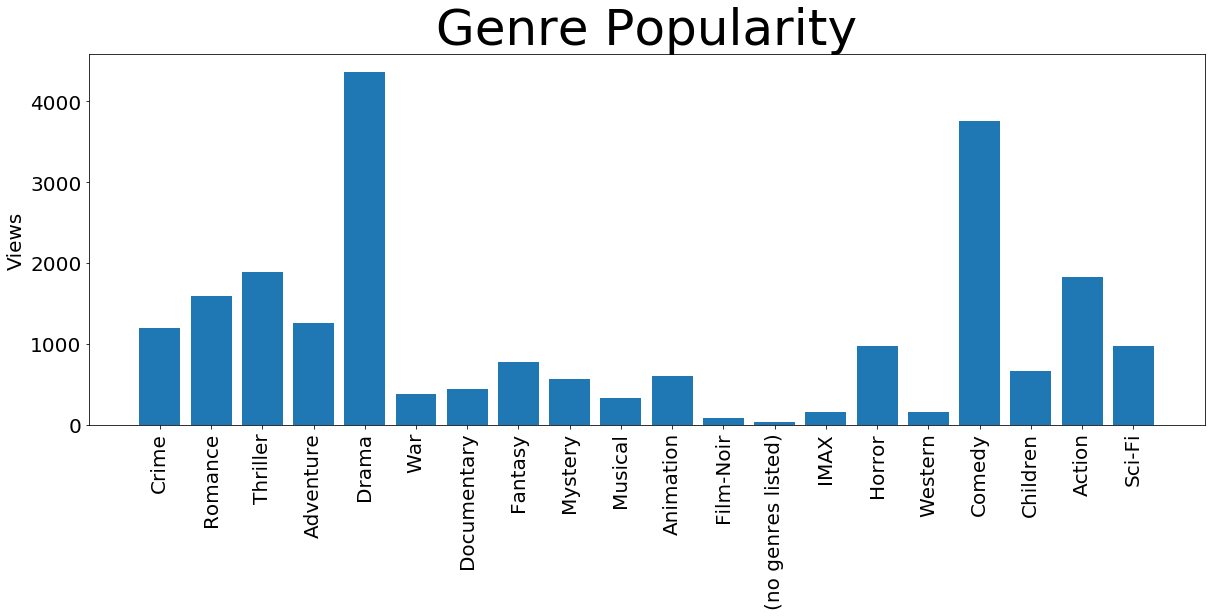

In [8]:
fig = plt.figure(1, figsize = (20, 15))
ax = fig.add_subplot(2, 1, 2)
x = [i for i, j in enumerate(g)]
y = [i[1] for i in g]
x_label = [i[0] for i in g]
plt.xticks(x, x_label)
plt.xticks(rotation = 90, fontsize = 20)
plt.yticks(fontsize = 20)

plt.ylabel("Views", fontsize = 20)
ax.bar(x, y, align = "center")
plt.title("Genre Popularity", fontsize = 50)
plt.show()

In [9]:
m.filter(movies.genres == "(no genres listed)").show()

+-------+--------------------+------------------+
|movieId|               title|            genres|
+-------+--------------------+------------------+
| 114335|   La cravate (1957)|(no genres listed)|
| 122888|      Ben-hur (2016)|(no genres listed)|
| 122896|Pirates of the Ca...|(no genres listed)|
| 129250|   Superfast! (2015)|(no genres listed)|
| 132084| Let It Be Me (1995)|(no genres listed)|
| 134861|Trevor Noah: Afri...|(no genres listed)|
| 141131|    Guardians (2016)|(no genres listed)|
| 141866|   Green Room (2015)|(no genres listed)|
| 142456|The Brand New Tes...|(no genres listed)|
| 143410|          Hyena Road|(no genres listed)|
| 147250|The Adventures of...|(no genres listed)|
| 149330|A Cosmic Christma...|(no genres listed)|
| 152037|  Grease Live (2016)|(no genres listed)|
| 155589|Noin 7 veljestä (...|(no genres listed)|
| 156605|            Paterson|(no genres listed)|
| 159161|Ali Wong: Baby Co...|(no genres listed)|
| 159779|A Midsummer Night...|(no genres listed)|


In [10]:
ratings.show()

+------+-------+------+---------+
|userId|movieId|rating|timestamp|
+------+-------+------+---------+
|     1|      1|   4.0|964982703|
|     1|      3|   4.0|964981247|
|     1|      6|   4.0|964982224|
|     1|     47|   5.0|964983815|
|     1|     50|   5.0|964982931|
|     1|     70|   3.0|964982400|
|     1|    101|   5.0|964980868|
|     1|    110|   4.0|964982176|
|     1|    151|   5.0|964984041|
|     1|    157|   5.0|964984100|
|     1|    163|   5.0|964983650|
|     1|    216|   5.0|964981208|
|     1|    223|   3.0|964980985|
|     1|    231|   5.0|964981179|
|     1|    235|   4.0|964980908|
|     1|    260|   5.0|964981680|
|     1|    296|   3.0|964982967|
|     1|    316|   3.0|964982310|
|     1|    333|   5.0|964981179|
|     1|    349|   4.0|964982563|
+------+-------+------+---------+
only showing top 20 rows



In [11]:
r = ratings.groupBy("rating").count()
r = r.orderBy("rating")
r.show()

+------+-----+
|rating|count|
+------+-----+
|   0.5| 1370|
|   1.0| 2811|
|   1.5| 1791|
|   2.0| 7551|
|   2.5| 5550|
|   3.0|20047|
|   3.5|13136|
|   4.0|26818|
|   4.5| 8551|
|   5.0|13211|
+------+-----+



In [12]:
rating_count = r.rdd.map(lambda l : [l[0], l[1]]).collect()

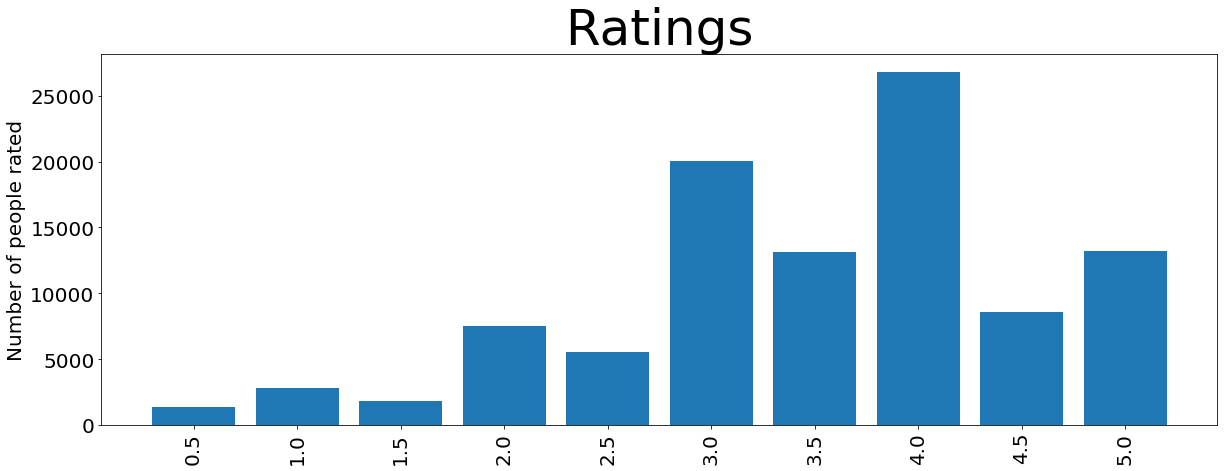

In [13]:
fig = plt.figure(1, figsize = (20, 15))
ax = fig.add_subplot(2, 1, 2)
x = [i for i, j in enumerate(rating_count)]
y = [i[1] for i in rating_count]
x_label = [i[0] for i in rating_count]
plt.xticks(x, x_label)
plt.xticks(rotation = 90, fontsize = 20)
plt.yticks(fontsize = 20)

plt.ylabel("Number of people rated", fontsize = 20)
ax.bar(x, y, align = "center")
plt.title("Ratings", fontsize = 50)
plt.show()

In [14]:
movie_views = ratings.groupBy("movieId").agg(count("userId")).withColumnRenamed("count(userId)", "views")
mv = movies.join(movie_views, movies.movieId == movie_views.movieId).drop(movies.genres).drop(m.movieId)

In [15]:
mv.show()

+--------------------+-------+-----+
|               title|movieId|views|
+--------------------+-------+-----+
|Men in Black (a.k...|   1580|  165|
|    King Kong (1933)|   2366|   25|
| Galaxy Quest (1999)|   3175|   75|
|Dirty Dancing (1987)|   1088|   42|
|Knockin' on Heave...|  32460|    4|
|Ice Age 2: The Me...|  44022|   23|
|Searching for Sug...|  96488|    4|
|   Local Hero (1983)|   1238|    9|
|     Candyman (1992)|   1342|   11|
|        Spawn (1997)|   1591|   26|
|The Devil's Advoc...|   1645|   51|
|Land Before Time,...|   4519|    9|
|American Tail: Fi...|   2142|   10|
|Hudsucker Proxy, ...|    471|   40|
|Dungeons & Dragon...|   3997|   12|
|High School High ...|    833|    6|
|Hellbound: Hellra...|   3918|    9|
|Tale of Two Siste...|   7982|    4|
|Out of Africa (1985)|   1959|   15|
|     17 Again (2009)|  68135|   10|
+--------------------+-------+-----+
only showing top 20 rows



In [16]:
movie_ratings = ratings.groupBy("movieId").agg(avg(col("rating"))).withColumnRenamed("avg(rating)", "averageRating")
ma = mv.join(movie_ratings, mv.movieId == movie_ratings.movieId).drop(movie_ratings.movieId)

In [17]:
ma.show()

+--------------------+-----+-------+------------------+
|               title|views|movieId|     averageRating|
+--------------------+-----+-------+------------------+
|Men in Black (a.k...|  165|   1580| 3.487878787878788|
|    King Kong (1933)|   25|   2366|              3.64|
| Galaxy Quest (1999)|   75|   3175|              3.58|
|Dirty Dancing (1987)|   42|   1088| 3.369047619047619|
|Knockin' on Heave...|    4|  32460|              4.25|
|Ice Age 2: The Me...|   23|  44022| 3.217391304347826|
|Searching for Sug...|    4|  96488|              4.25|
|   Local Hero (1983)|    9|   1238| 4.055555555555555|
|     Candyman (1992)|   11|   1342|               2.5|
|        Spawn (1997)|   26|   1591|2.6346153846153846|
|The Devil's Advoc...|   51|   1645| 3.411764705882353|
|Land Before Time,...|    9|   4519|3.3333333333333335|
|American Tail: Fi...|   10|   2142|               2.7|
|Hudsucker Proxy, ...|   40|    471|              3.55|
|Dungeons & Dragon...|   12|   3997|1.8333333333

In [18]:
mr = m.join(ratings, m.movieId == ratings.movieId).drop(ratings.movieId)
mr.show()

+-------+--------------------+---------+------+------+---------+
|movieId|               title|   genres|userId|rating|timestamp|
+-------+--------------------+---------+------+------+---------+
|      1|    Toy Story (1995)|  Fantasy|     1|   4.0|964982703|
|      1|    Toy Story (1995)|   Comedy|     1|   4.0|964982703|
|      1|    Toy Story (1995)| Children|     1|   4.0|964982703|
|      1|    Toy Story (1995)|Animation|     1|   4.0|964982703|
|      1|    Toy Story (1995)|Adventure|     1|   4.0|964982703|
|      3|Grumpier Old Men ...|  Romance|     1|   4.0|964981247|
|      3|Grumpier Old Men ...|   Comedy|     1|   4.0|964981247|
|      6|         Heat (1995)| Thriller|     1|   4.0|964982224|
|      6|         Heat (1995)|    Crime|     1|   4.0|964982224|
|      6|         Heat (1995)|   Action|     1|   4.0|964982224|
|     47|Seven (a.k.a. Se7...| Thriller|     1|   5.0|964983815|
|     47|Seven (a.k.a. Se7...|  Mystery|     1|   5.0|964983815|
|     50|Usual Suspects, 